In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install DateTime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib
import yfinance as yf
import pytz
from datetime import timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

import streamlit as st

from datetime import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
sp500 = yf.Ticker("^GSPC")
sp500.history(period = "max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-25 00:00:00-04:00,5219.520020,5229.089844,5216.089844,5218.189941,3331360000,0.0,0.0
2024-03-26 00:00:00-04:00,5228.850098,5235.160156,5203.419922,5203.580078,3871790000,0.0,0.0
2024-03-27 00:00:00-04:00,5226.310059,5249.259766,5213.919922,5248.490234,3850500000,0.0,0.0


In [11]:
sp500.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 5254.35,
 'open': 5257.97,
 'dayLow': 5229.2,
 'dayHigh': 5263.95,
 'regularMarketPreviousClose': 5254.35,
 'regularMarketOpen': 5257.97,
 'regularMarketDayLow': 5229.2,
 'regularMarketDayHigh': 5263.95,
 'volume': 1949342000,
 'regularMarketVolume': 1949342000,
 'averageVolume': 4100070819,
 'averageVolume10days': 4252085000,
 'averageDailyVolume10Day': 4252085000,
 'bid': 5191.68,
 'ask': 5289.19,
 'fiftyTwoWeekLow': 4048.28,
 'fiftyTwoWeekHigh': 5264.85,
 'fiftyDayAverage': 5046.774,
 'twoHundredDayAverage': 4618.447,
 'currency': 'USD',
 'exchange': 'SNP',
 'quoteType': 'INDEX',
 'symbol': '^GSPC',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500',
 'longName': 'S&P 500',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': '8ffd55d1-3d1d-3733-a480-56768bc708e6',
 'messageBoardId': 'finmb_INDEXGSPC',
 'gmtOffSetMilliseconds': -14400000,
 'trailingPegRatio': Non

In [12]:
sp500_history = sp500.history(period="max")
sp500_history.sort_values('Date', inplace=True, ascending=False)
print(sp500_history.head())

                                  Open         High          Low        Close  \
Date                                                                            
2024-04-01 00:00:00-04:00  5257.970215  5263.950195  5229.200195  5243.770020   
2024-03-28 00:00:00-04:00  5248.029785  5264.850098  5245.819824  5254.350098   
2024-03-27 00:00:00-04:00  5226.310059  5249.259766  5213.919922  5248.490234   
2024-03-26 00:00:00-04:00  5228.850098  5235.160156  5203.419922  5203.580078   
2024-03-25 00:00:00-04:00  5219.520020  5229.089844  5216.089844  5218.189941   

                               Volume  Dividends  Stock Splits  
Date                                                            
2024-04-01 00:00:00-04:00  1949342000        0.0           0.0  
2024-03-28 00:00:00-04:00  3998270000        0.0           0.0  
2024-03-27 00:00:00-04:00  3850500000        0.0           0.0  
2024-03-26 00:00:00-04:00  3871790000        0.0           0.0  
2024-03-25 00:00:00-04:00  3331360000     

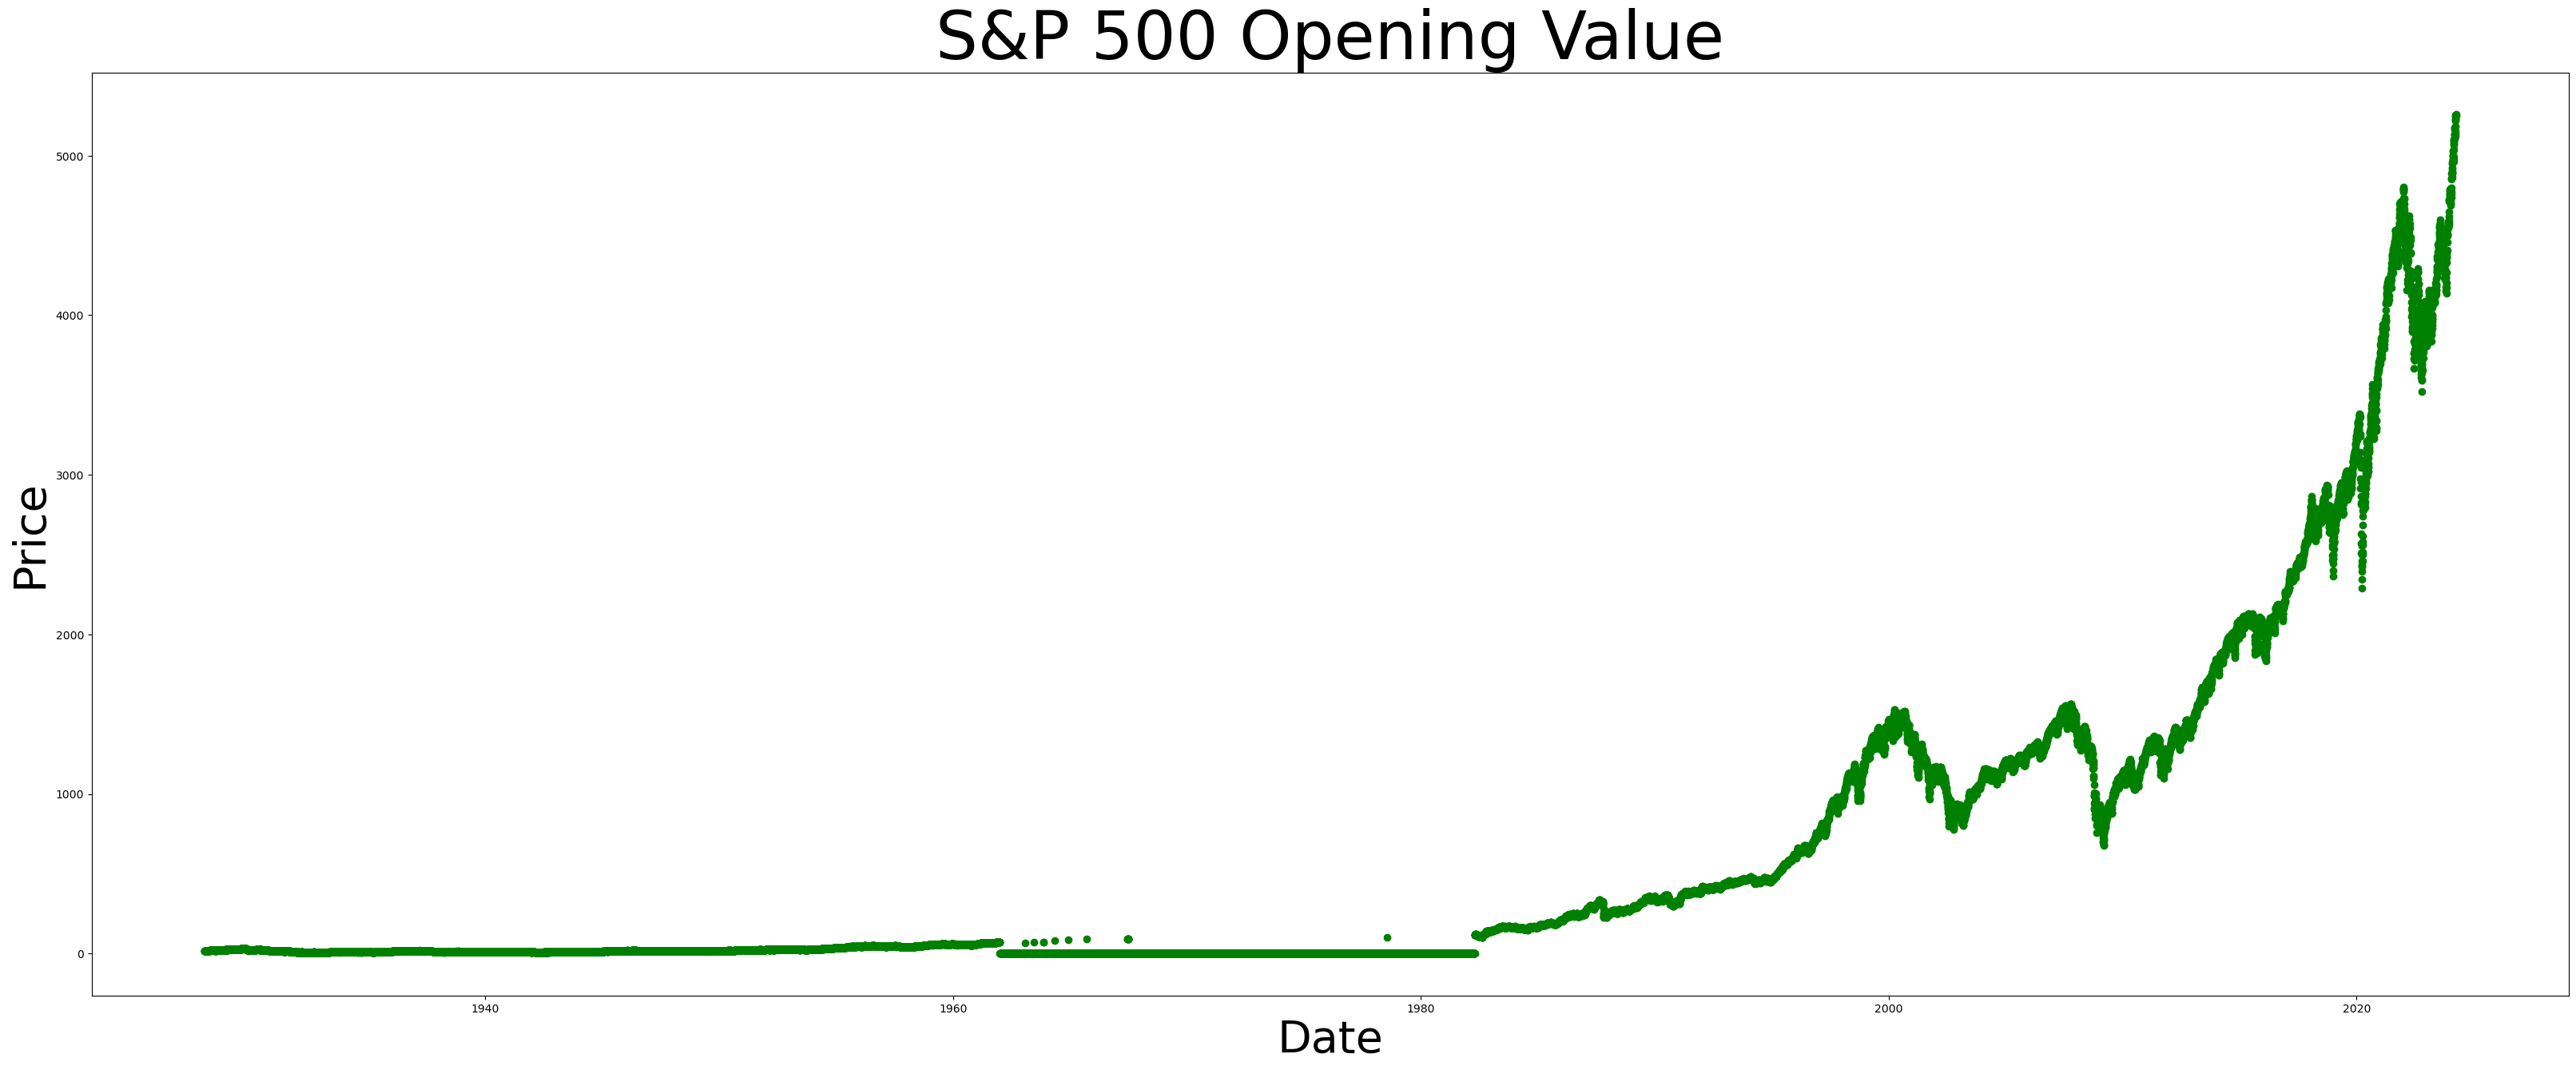

In [13]:
# Plotting the Opening Value of the S&P 500 index
plt.figure(figsize=(40, 15))
plt.scatter(sp500_history.index, sp500_history['Open'], c='g')
plt.title('S&P 500 Opening Value', fontsize=60)
plt.xlabel('Date', fontsize=40)
plt.ylabel('Price', fontsize=40)
plt.show()

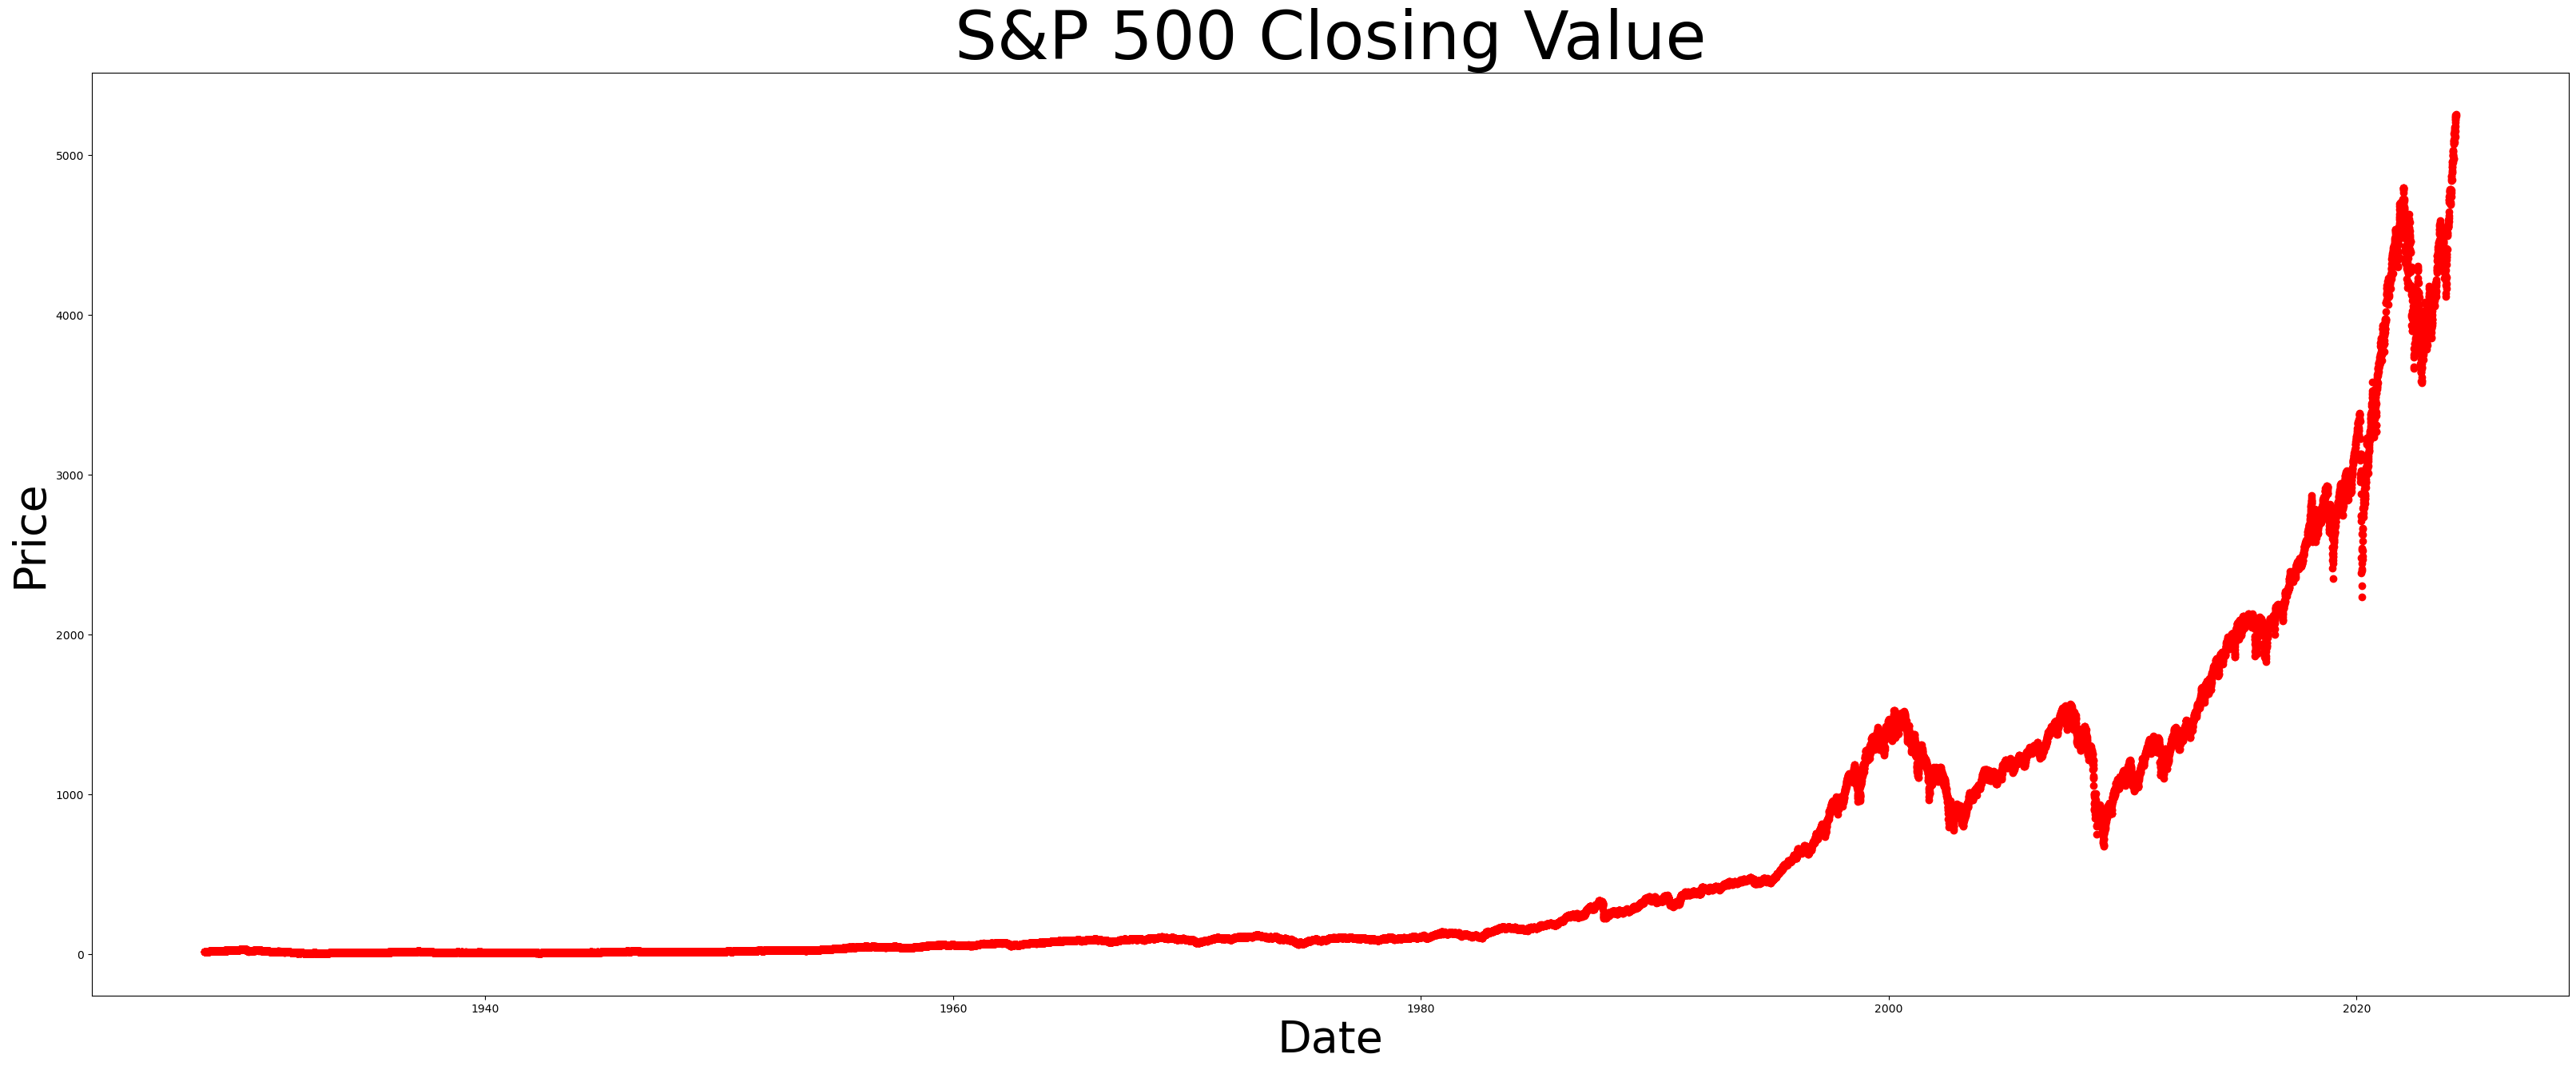

In [14]:
# Plotting the Closing Value of the S&P 500 index
plt.figure(figsize=(40, 15))
plt.scatter(sp500_history.index, sp500_history['Close'], c='r')
plt.title('S&P 500 Closing Value', fontsize=60)
plt.xlabel('Date', fontsize=40)
plt.ylabel('Price', fontsize=40)
plt.show()

In [23]:
print(sp500_history.head())
sp500_history['5_day_avg'] = sp500_history['Close'].rolling(window=5).mean().shift(1)
sp500_history['30_day_avg'] = sp500_history['Close'].rolling(window=30).mean().shift(1)
sp500_history['year_avg'] = sp500_history['Close'].rolling(window=365).mean().shift(1)
sp500_history['avg_ratio'] = sp500_history['5_day_avg'] / sp500_history['year_avg']
sp500_history['5_day_std'] = sp500_history['Close'].rolling(window=5).std().shift(1)
sp500_history['year_std'] = sp500_history['Close'].rolling(window=365).mean().shift(1)
sp500_history['std_ratio'] = sp500_history['5_day_std'] / sp500_history['year_std']

                                  Open         High          Low        Close  \
Date                                                                            
2022-10-14 00:00:00-04:00  3690.409912  3712.000000  3579.679932  3583.070068   
2022-10-13 00:00:00-04:00  3520.370117  3685.409912  3491.580078  3669.909912   
2022-10-12 00:00:00-04:00  3590.830078  3608.340088  3573.860107  3577.030029   
2022-10-11 00:00:00-04:00  3595.860107  3640.659912  3568.449951  3588.840088   
2022-10-10 00:00:00-04:00  3647.510010  3652.169922  3588.100098  3612.389893   

                               Volume  Dividends  Stock Splits  5_day_avg  \
Date                                                                        
2022-10-14 00:00:00-04:00  4243030000        0.0           0.0        NaN   
2022-10-13 00:00:00-04:00  5021680000        0.0           0.0        NaN   
2022-10-12 00:00:00-04:00  4006830000        0.0           0.0        NaN   
2022-10-11 00:00:00-04:00  4759030000        0.

In [29]:
print(sp500_history.index)
print(sp500_history.index.isnull().sum())
sp500_history = sp500_history.reset_index()

RangeIndex(start=0, stop=23447, step=1)
0


In [30]:
sp500_history.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', '5_day_avg', '30_day_avg', 'year_avg', 'avg_ratio',
       '5_day_std', 'year_std', 'std_ratio'],
      dtype='object')

In [32]:
# Drop rows with missing values
sp500_history = sp500_history.dropna(axis=0)
sp500_history.isnull().sum()

index           0
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
5_day_avg       0
30_day_avg      0
year_avg        0
avg_ratio       0
5_day_std       0
year_std        0
std_ratio       0
dtype: int64

In [44]:
tz = pytz.timezone('America/New_York')  # Assuming the timezone is 'America/New_York'
dt = tz.localize(datetime(year=2021, month=3, day=1))

train = sp500_history[sp500_history['Date'] < dt]
train = sp500_history[sp500_history['Date'].dt.tz_localize(None) < datetime(year=2021, month=3, day=1)]
train

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,5_day_avg,30_day_avg,year_avg,avg_ratio,5_day_std,year_std,std_ratio
47,47,2021-02-26 00:00:00-05:00,3839.659912,3861.080078,3789.540039,3811.149902,6526070000,0.0,0.0,3840.447998,3951.577344,4299.990107,0.893129,50.669991,4299.990107,0.011784
48,48,2021-02-25 00:00:00-05:00,3915.800049,3925.020020,3814.040039,3829.340088,6547470000,0.0,0.0,3834.289990,3941.015999,4299.137175,0.891874,52.288476,4299.137175,0.012163
49,49,2021-02-24 00:00:00-05:00,3873.709961,3928.649902,3859.600098,3925.429932,6012790000,0.0,0.0,3846.464014,3931.034009,4298.285887,0.894883,38.365125,4298.285887,0.008926
50,50,2021-02-23 00:00:00-05:00,3857.070068,3895.979980,3805.590088,3881.370117,6296610000,0.0,0.0,3867.606006,3925.309342,4297.683805,0.899928,47.887850,4297.683805,0.011143
51,51,2021-02-22 00:00:00-05:00,3885.550049,3902.919922,3874.709961,3876.500000,5917100000,0.0,0.0,3869.822021,3918.690015,4296.942518,0.900599,48.297717,4296.942518,0.011240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23442,23442,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.454000,17.448000,21.714164,0.803807,0.095026,21.714164,0.004376
23443,23443,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.470000,17.471667,21.689616,0.805455,0.123895,21.689616,0.005712
23444,23444,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.486000,17.488667,21.665178,0.807102,0.128957,21.665178,0.005952
23445,23445,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.560000,17.501000,21.641616,0.811400,0.137295,21.641616,0.006344


In [45]:
train = sp500_history[sp500_history['Date'] > dt]
test = sp500_history[sp500_history["Date"].dt.tz_localize(None) > datetime(year=2021, month=3, day=1)]
test

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,5_day_avg,30_day_avg,year_avg,avg_ratio,5_day_std,year_std,std_ratio
0,0,2021-05-05 00:00:00-04:00,4177.060059,4187.720215,4160.939941,4167.589844,4230920000,0.0,0.0,4167.558105,4192.407682,4285.798300,0.972411,65.171506,4285.798300,0.015206
1,1,2021-05-04 00:00:00-04:00,4179.040039,4179.040039,4128.589844,4164.660156,4452460000,0.0,0.0,4188.468066,4190.598682,4287.399724,0.976925,31.141385,4287.399724,0.007263
2,2,2021-05-03 00:00:00-04:00,4191.979980,4209.390137,4188.029785,4192.660156,4070220000,0.0,0.0,4190.980078,4188.630680,4288.755205,0.977202,27.801888,4288.755205,0.006483
3,3,2021-04-30 00:00:00-04:00,4198.100098,4198.100098,4174.850098,4181.169922,4300880000,0.0,0.0,4191.826074,4186.833024,4290.441862,0.977015,27.769236,4290.441862,0.006472
4,4,2021-04-29 00:00:00-04:00,4206.140137,4218.779785,4176.810059,4211.470215,4298680000,0.0,0.0,4181.540039,4184.367025,4292.064684,0.974249,15.863022,4292.064684,0.003696
5,5,2021-04-28 00:00:00-04:00,4185.140137,4201.529785,4181.779785,4183.180176,3787360000,0.0,0.0,4183.510059,4183.168034,4293.706000,0.974335,19.233713,4293.706000,0.004480
6,6,2021-04-27 00:00:00-04:00,4188.250000,4193.350098,4176.220215,4186.720215,3710700000,0.0,0.0,4186.628125,4181.301367,4295.195096,0.974724,17.159449,4295.195096,0.003995
7,7,2021-04-26 00:00:00-04:00,4185.029785,4194.189941,4182.359863,4187.620117,3748320000,0.0,0.0,4191.040137,4180.207048,4296.406604,0.975476,12.225735,4296.406604,0.002846
8,8,2021-04-23 00:00:00-04:00,4138.779785,4194.169922,4138.779785,4180.169922,3569880000,0.0,0.0,4190.032129,4178.885726,4297.514385,0.974990,12.266480,4297.514385,0.002854
9,9,2021-04-22 00:00:00-04:00,4170.459961,4179.569824,4123.689941,4134.979980,4245140000,0.0,0.0,4189.832129,4177.340723,4298.580796,0.974701,12.453820,4298.580796,0.002897


In [46]:
features = ['5_day_avg', '30_day_avg', 'year_avg', 'avg_ratio', '5_day_std','year_std', 'std_ratio']
y_train = train['Close']
y_test = test['Close']

model = LinearRegression()
model.fit(train[features], y_train) 
predictions = model.predict(test[features]) 
mae = mean_absolute_error(test['Close'], predictions)
mae

26.005261875680805

Text(0, 0.5, 'Stock Price')

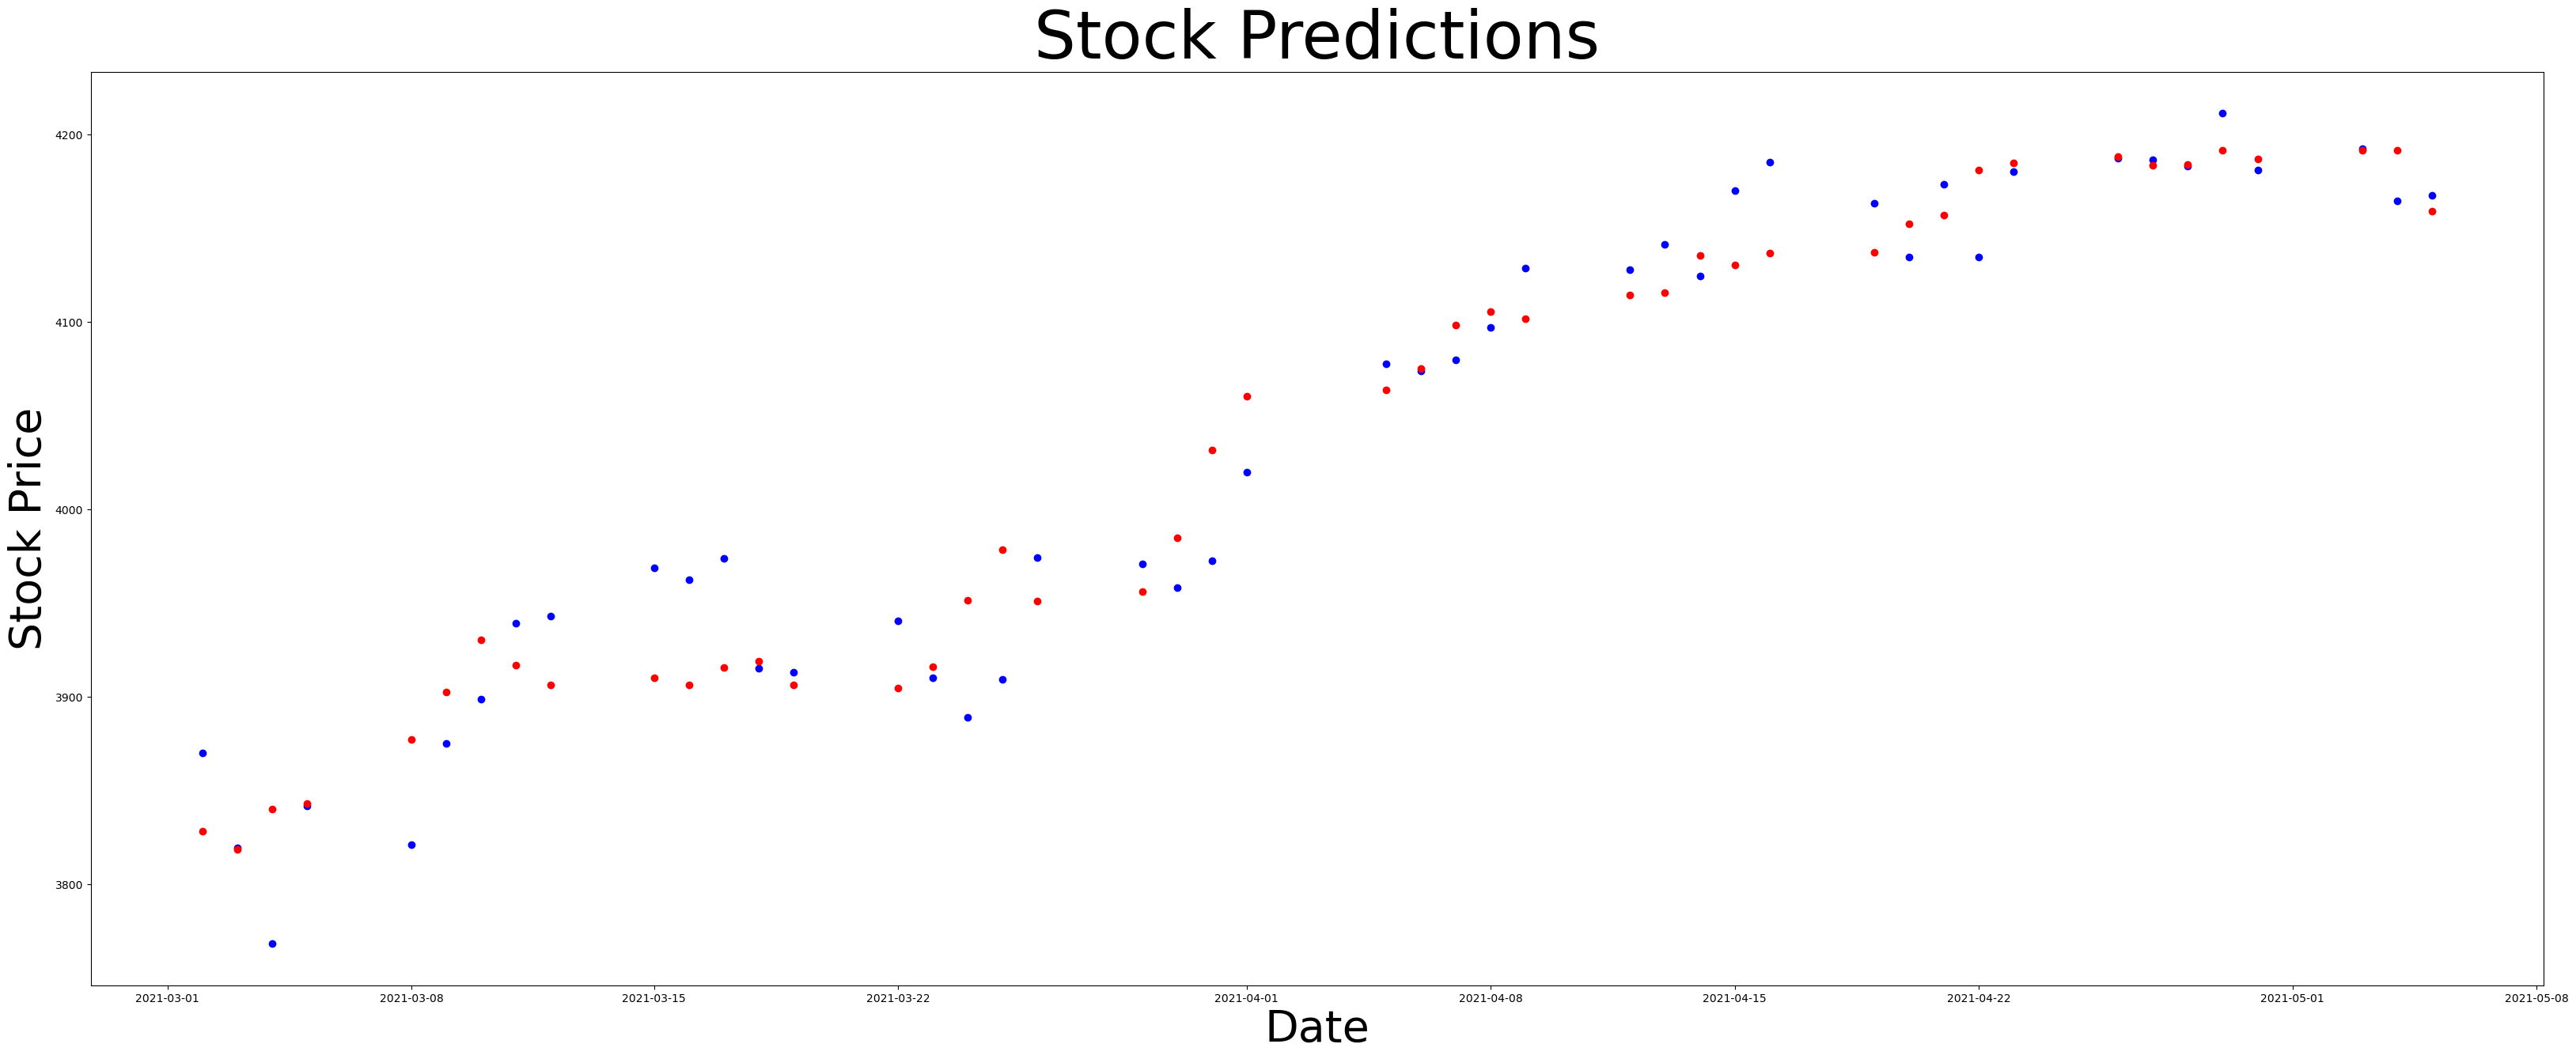

In [47]:
plt.figure(figsize=(40,15))
plt.scatter(test['Date'], test['Close'], c='b')
plt.scatter(test['Date'], predictions, c='r')
plt.title('Stock Predictions', fontsize=60)
plt.xlabel('Date', fontsize=40)
plt.ylabel('Stock Price', fontsize=40)